In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as st

In [2]:
filename = "resources/employers_clean.csv"
employers_df=pd.read_csv(filename)

In [3]:
employers_df.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino


In [4]:
employers_reduced = employers_df[employers_df["TICKER"] != 'none'].reset_index(drop=True)

In [5]:
employers_reduced.head(24)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,"80,000",4.2,Atlanta
6,7,Costco Wholesale,COST,Retail and Wholesale,United States,"288,000",4.0,Issaquah
7,8,Adobe,ADBE,"IT, Internet, Software & Services",United States,"25,988",4.4,San Jose
8,9,Southwest Airlines,LUV,Transportation and Logistics,United States,"55,093",4.4,Dallas
9,10,Dell Technologies,DELL,"Semiconductors, Electronics, Electrical Engine...",United States,"133,000",4.3,Round Rock


In [7]:
employers_reduced['1 year stock performance']=""
employers_reduced['return on equity']=""
employers_reduced

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,,
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,,
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,,
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,,
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,,
...,...,...,...,...,...,...,...,...,...,...
80,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,,
81,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,,
82,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,,
83,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,,


In [8]:
print('Finding stock data..')
print("-"*20)
for index,row in employers_reduced.iterrows():
    company=employers_reduced.loc[index,'NAME']
    ticker=employers_reduced.loc[index,'TICKER']
    stock_data=yf.Ticker(ticker)
    try:
        employers_reduced.loc[index, "1 year stock performance"]=round(stock_data.info["52WeekChange"]*100,2)
        employers_reduced.loc[index, "return on equity"]=round(stock_data.info["returnOnEquity"]*100,2)
    except:
        employers_reduced.loc[index, "1 year stock performance"]="No data found"

    print(f"{company} ({ticker}): {employers_reduced.loc[index, '1 year stock performance']}% 1yr stock performance; {employers_reduced.loc[index, 'return on equity']}% RoE")
    print("-"*20)

employers_reduced

Finding stock data..
--------------------
Samsung Electronics (005930.KS): -23.07% 1yr stock performance; 13.29% RoE
--------------------
Microsoft (MSFT): -27.89% 1yr stock performance; 42.88% RoE
--------------------
IBM (IBM): 8.04% 1yr stock performance; 6.48% RoE
--------------------
Alphabet (GOOG): -37.04% 1yr stock performance; 26.89% RoE
--------------------
Apple (AAPL): -25.66% 1yr stock performance; 175.46% RoE
--------------------
Delta Air Lines (DAL): -10.82% 1yr stock performance; 2.25% RoE
--------------------
Costco Wholesale (COST): -8.29% 1yr stock performance; 29.32% RoE
--------------------
Adobe (ADBE): -35.46% 1yr stock performance; 32.97% RoE
--------------------
Southwest Airlines (LUV): -22.3% 1yr stock performance; 7.81% RoE
--------------------
Dell Technologies (DELL): -29.59% 1yr stock performance; 33.01% RoE
--------------------
Lockheed Martin (LMT): 26.05% 1yr stock performance; 54.35% RoE
--------------------
Cisco Systems (CSCO): -22.11% 1yr stock pe

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,-23.07,13.29
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,-27.89,42.88
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,8.04,6.48
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,-37.04,26.89
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,-25.66,175.46
...,...,...,...,...,...,...,...,...,...,...
80,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,-0.48,11.79
81,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,1.28,147.74
82,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,18.28,-6.42
83,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,-19.13,26.71


In [17]:
stock_roe_df=employers_reduced[employers_reduced["1 year stock performance"]!="No data found"].reset_index(drop=True)
stock_roe_df

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,-23.07,13.29
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,-27.89,42.88
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,8.04,6.48
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,-37.04,26.89
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,-25.66,175.46
...,...,...,...,...,...,...,...,...,...,...
73,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,-0.48,11.79
74,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,1.28,147.74
75,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,18.28,-6.42
76,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,-19.13,26.71


In [22]:
stock = stock_roe_df['1 year stock performance'].astype(float)
stock_z=st.zscore(stock)

stock_roe_df['stock_z']=stock_z

roe= stock_roe_df['return on equity'].astype(float)
roe_z=st.zscore(roe)

stock_roe_df['roe_z']=roe_z

In [23]:
stock_roe_df.head(25)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,stock_z,roe_z
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,-23.07,13.29,-0.310710,-0.190156
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,-27.89,42.88,-0.554099,-0.012859
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,8.04,6.48,1.260210,-0.230960
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,-37.04,26.89,-1.016135,-0.108668
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,-25.66,175.46,-0.441494,0.781536
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,"80,000",4.2,Atlanta,-10.82,2.25,0.307862,-0.256306
6,7,Costco Wholesale,COST,Retail and Wholesale,United States,"288,000",4.0,Issaquah,-8.29,29.32,0.435616,-0.094108
7,8,Adobe,ADBE,"IT, Internet, Software & Services",United States,"25,988",4.4,San Jose,-35.46,32.97,-0.936351,-0.072237
8,9,Southwest Airlines,LUV,Transportation and Logistics,United States,"55,093",4.4,Dallas,-22.3,7.81,-0.271829,-0.222991
9,10,Dell Technologies,DELL,"Semiconductors, Electronics, Electrical Engine...",United States,"133,000",4.3,Round Rock,-29.59,33.01,-0.639942,-0.071998


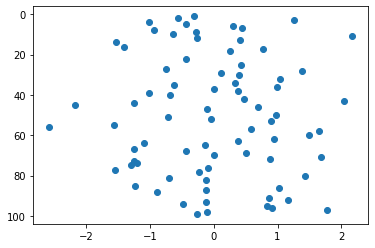

In [38]:
plt.scatter(stock_roe_df['stock_z'],stock_roe_df['RANK'])
plt.gca().invert_yaxis()
plt.show()

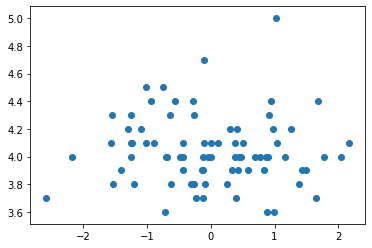

In [37]:
plt.scatter(stock_roe_df['stock_z'],stock_roe_df['Glassdoor Rating'])
plt.show()

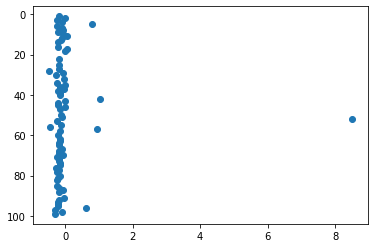

In [41]:
plt.scatter(stock_roe_df['roe_z'],stock_roe_df['RANK'])
plt.gca().invert_yaxis()

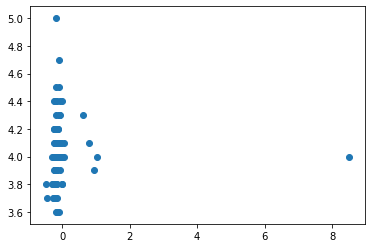

In [46]:
plt.scatter(stock_roe_df['roe_z'],stock_roe_df['Glassdoor Rating'])
plt.show()